In [1]:
import pandas as pd
import numpy as np
import os

# Define the path to your directory
path = 'C:/Users/Home PC/Documents/P5/ProjectCode/Expanded_Experiment/Files/'
os.chdir(path)

training_df = pd.read_excel('Training/training_dataset_P5.xlsx', 'Sheet1')

print('training data loaded successfully!')

training data loaded successfully!


LIV_KIT_bin
0_insufficient    105
2_preferred        80
1_sufficient       71
Name: count, dtype: int64


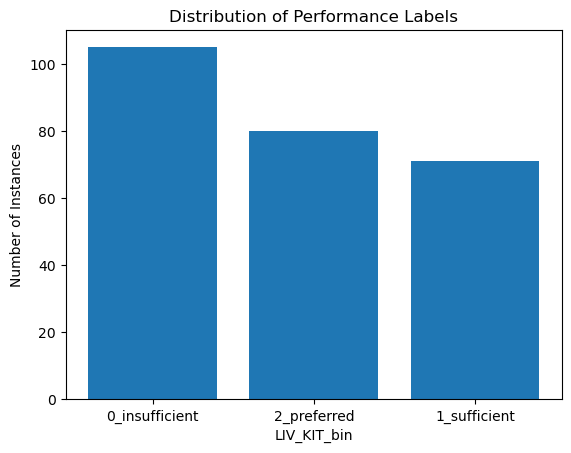

Number of unique 'unit_id' values: 256
apartment_id                             object
site_id                                   int64
building_id                               int64
plan_id                                   int64
floor_id                                  int64
                                         ...   
connectivity_kitchen_distance_p20       float64
connectivity_kitchen_distance_p80       float64
connectivity_kitchen_distance_stddev    float64
layout_biggest_rectangle_length         float64
layout_biggest_rectangle_width          float64
Length: 71, dtype: object


In [2]:
import matplotlib.pyplot as plt

# Get the counts of each category
value_counts = training_df['LIV_KIT_bin'].value_counts()
print(training_df['LIV_KIT_bin'].value_counts())

# Create a bar plot
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('LIV_KIT_bin')
plt.ylabel('Number of Instances')
plt.title('Distribution of Performance Labels')
plt.show()
# Check the number of unique 'unit_id' values in the training_set DataFrame
unique_unit_ids = training_df['unit_id'].nunique()
print("Number of unique 'unit_id' values:", unique_unit_ids)
print(training_df.dtypes)


LIV_BATH_bin
0_insufficient    137
1_sufficient      119
Name: count, dtype: int64


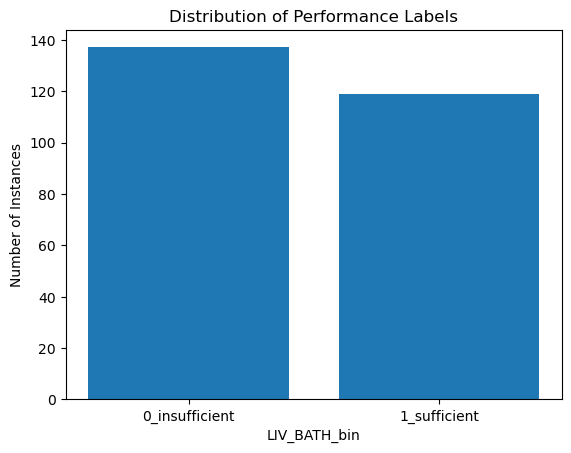

Number of unique 'unit_id' values: 256
Index(['apartment_id', 'site_id', 'building_id', 'plan_id', 'floor_id',
       'unit_id', 'area_id', 'unit_usage', 'entity_type', 'entity_subtype',
       'geometry', 'elevation', 'height', 'LIV_KIT', 'LIV_BED1', 'LIV_BED2',
       'LIV_BED3', 'LIV_BED4', 'LIV_BED5', 'LIV_BED6', '# OF BEDS',
       'LIV_BATH1', 'LIV_BATH2', 'LIV_BATH3', '# OF BATH', 'invalid_geometry',
       'LIV_KIT_bin', 'LIV_KIT_bin_mapped', 'layout_compactness',
       'layout_std_walllengths', 'layout_perimeter', 'layout_door_perimeter',
       'layout_open_perimeter', 'layout_number_of_doors',
       'connectivity_entrance_door_distance_max',
       'connectivity_entrance_door_distance_mean',
       'connectivity_entrance_door_distance_median',
       'connectivity_entrance_door_distance_min',
       'connectivity_entrance_door_distance_p20',
       'connectivity_entrance_door_distance_p80',
       'connectivity_entrance_door_distance_stddev',
       'connectivity_betweenne

In [3]:
# Add sightlines from living to toilet label with two possible classes: insufficient and sufficient
training_df['LIV_BATH_bin'] = training_df[['LIV_BATH1', 'LIV_BATH2']].max(axis=1).apply(lambda x: '0_insufficient' if x == 0 else '1_sufficient').astype(str)

# Get the counts of each category
value_counts = training_df['LIV_BATH_bin'].value_counts()
print(training_df['LIV_BATH_bin'].value_counts())

# Create a bar plot
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('LIV_BATH_bin')
plt.ylabel('Number of Instances')
plt.title('Distribution of Performance Labels')
plt.show()
# Check the number of unique 'unit_id' values in the training_set DataFrame
unique_unit_ids = training_df['unit_id'].nunique()
print("Number of unique 'unit_id' values:", unique_unit_ids)
print(training_df.columns)

# Bath Bin Mapping

# Define a mapping dictionary
bin_mapping = {'0_insufficient': 0, '1_sufficient': 1}

# Map the values and create a new column
training_df['LIV_BATH_bin_mapped'] = training_df['LIV_BATH_bin'].map(bin_mapping)

pd.set_option('display.max_columns', None)  # Display all columns
print(training_df.dtypes)



     LIV_BED_count  LIV_BED_ratio     LIV_BED_bin
0                1       0.333333    1_sufficient
1                0       0.000000  0_insufficient
2                0       0.000000  0_insufficient
3                2       0.500000    1_sufficient
4                0       0.000000  0_insufficient
..             ...            ...             ...
251              2       0.500000    1_sufficient
252              2       0.666667     2_preferred
253              0       0.000000  0_insufficient
254              1       0.500000    1_sufficient
255              0       0.000000  0_insufficient

[256 rows x 3 columns]
LIV_BED_bin
0_insufficient    118
2_preferred        72
1_sufficient       66
Name: count, dtype: int64


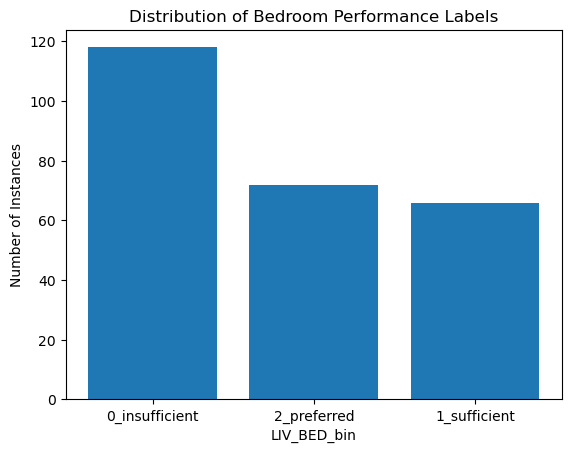

In [4]:
# Calculate the number of bedrooms with sightline greater than 0
training_df['LIV_BED_count'] = training_df[['LIV_BED1', 'LIV_BED2', 'LIV_BED3', 'LIV_BED4', 'LIV_BED5', 'LIV_BED6']].apply(lambda row: (row > 0).sum(), axis=1)
# Calculate the ratio
training_df['LIV_BED_ratio'] = training_df['LIV_BED_count'] / training_df['# OF BEDS']

# Create the LIV_BED_bin column based on the ratio
def classify_bed_ratio(ratio):
    if ratio > 0.5:
        return '2_preferred'
    elif ratio > 0.25:
        return '1_sufficient'
    else:
        return '0_insufficient'

training_df['LIV_BED_bin'] = training_df['LIV_BED_ratio'].apply(classify_bed_ratio)

# Print the resulting DataFrame
print(training_df[['LIV_BED_count', 'LIV_BED_ratio', 'LIV_BED_bin']])

# Get the counts of each category
value_counts = training_df['LIV_BED_bin'].value_counts()
print(training_df['LIV_BED_bin'].value_counts())

# Create a bar plot
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('LIV_BED_bin')
plt.ylabel('Number of Instances')
plt.title('Distribution of Bedroom Performance Labels')
plt.show()

In [5]:
# Create a DataFrame with column indices and names
index_names_df = pd.DataFrame({'Index': range(len(training_df.columns)), 'Column Name': training_df.columns})

# Convert DataFrame to a list of tuples (index, column name)
index_names_list = list(index_names_df.to_records(index=False))

# Print the list of tuples
print("List of column indices and names:")
print(index_names_list)

# STEP 4: Add all fitures from simulation file 
column_indices = [[26,27,71,72], # Assessment result and mapping (71 for the bath)
                  [28,29,30,31,32,32,33], # Layout compactness
                  [], # Adjacencies and relationships
                  [], # Centrality 
                  [38,39], # Distance to entrance door 
                  [45,46], # Betweeenness
                  [52,53], # Closesness
                  [], # (living?) Room distances
                  [], # Living - Dining distance
                  [59,60], # Bathroom distance
                  [66,67], # Kitchen distance
                  [], # Distance to balcony
                  [69,70]] # Layout biggest rectangle length and width



training_df = training_df.iloc[:, [item for sublist in column_indices for item in sublist]]

# Get column names of Swiss_sim_selected
column_names = list(training_df.columns)
print(column_names)

List of column indices and names:
[(0, 'apartment_id'), (1, 'site_id'), (2, 'building_id'), (3, 'plan_id'), (4, 'floor_id'), (5, 'unit_id'), (6, 'area_id'), (7, 'unit_usage'), (8, 'entity_type'), (9, 'entity_subtype'), (10, 'geometry'), (11, 'elevation'), (12, 'height'), (13, 'LIV_KIT'), (14, 'LIV_BED1'), (15, 'LIV_BED2'), (16, 'LIV_BED3'), (17, 'LIV_BED4'), (18, 'LIV_BED5'), (19, 'LIV_BED6'), (20, '# OF BEDS'), (21, 'LIV_BATH1'), (22, 'LIV_BATH2'), (23, 'LIV_BATH3'), (24, '# OF BATH'), (25, 'invalid_geometry'), (26, 'LIV_KIT_bin'), (27, 'LIV_KIT_bin_mapped'), (28, 'layout_compactness'), (29, 'layout_std_walllengths'), (30, 'layout_perimeter'), (31, 'layout_door_perimeter'), (32, 'layout_open_perimeter'), (33, 'layout_number_of_doors'), (34, 'connectivity_entrance_door_distance_max'), (35, 'connectivity_entrance_door_distance_mean'), (36, 'connectivity_entrance_door_distance_median'), (37, 'connectivity_entrance_door_distance_min'), (38, 'connectivity_entrance_door_distance_p20'), (39,

## Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer
from sklearn.model_selection import KFold



##  Custom Scoring Function for Subset Accuracy
In this section, we define and implement a custom scoring function specifically designed for multi-output classification tasks. This custom scoring function, known as subset accuracy, evaluates the performance of our model by checking if all predicted labels for each instance match the true labels exactly.<br><br>






Why Subset Accuracy?<br><br>

- Stringency: Subset accuracy is a stringent metric. It considers a prediction correct only if all labels for an instance are correctly predicted. This means that even if only one label is incorrect, the entire prediction for that instance is considered incorrect.<br>
- Comprehensive Evaluation: This metric provides a comprehensive evaluation of our model's performance, ensuring that the model performs well across all outputs, not just on average.
- Applicability: Subset accuracy is particularly useful in scenarios where partial correctness is not acceptable, such as in medical diagnoses, safety systems, or quality control.<br><br>
<br>
The custom scoring function subset_accuracy_score is defined as follows:
<br>
- y_true == y_pred: Creates a boolean array indicating which predictions match the true values.<br>
- np.all(..., axis=1): Checks if all labels for each instance are correct.<br>
- np.mean(...): Calculates the mean of these boolean values, providing the subset accuracy score.<br><br>

We then wrap this function using make_scorer from scikit-learn to make it compatible with scikit-learn's model selection and evaluation tools:
<br>
This custom scorer will be used in subsequent steps, such as hyperparameter tuning and feature selection, to ensure that our model is evaluated and optimized based on its ability to predict all output labels correctly for each instance.<br>




In [7]:
# Custom scoring function for subset accuracy
def subset_accuracy_score(y_true, y_pred):
    return np.mean(np.all(y_true == y_pred, axis=1))
subset_accuracy_scorer = make_scorer(subset_accuracy_score)

# Custom scoring function for Hamming loss
def hamming_loss_score(y_true, y_pred):
    return np.sum(y_true.values != y_pred) / np.size(y_true)
hamming_loss_scorer = make_scorer(hamming_loss_score, greater_is_better=False)


## Hyperparameter range<br>
Here you can assign the individual hyperparameters for the Random Forest Classifier or comment out the ones that should be left at default values. 

In [8]:

# Define hyperparameters for grid search
param_grid = {
    'estimator__n_estimators': [int(x) for x in np.linspace(start=500, stop=500, num=1)],
    'estimator__criterion': ['gini']
    # 'estimator__max_depth': [None],
    # 'estimator__min_samples_split': [2],
    # 'estimator__min_samples_leaf': [1],
    # 'estimator__min_weight_fraction_leaf': [0.0],
    # 'estimator__max_features': ['sqrt'],
    # 'estimator__max_leaf_nodes': [None],
    # 'estimator__min_impurity_decrease': [0.0],
    # 'estimator__bootstrap': [True],
    # 'estimator__oob_score': [False],
    # 'estimator__n_jobs': [None],
    # 'estimator__warm_start': [False]
}

# Other parameters
test_size = 0.3
random_state = 42  # Fixed random state for reproducibility
cv_folds = 5
# Set up cross-validation with a fixed random seed
cv = KFold(n_splits=cv_folds, shuffle=True, random_state=random_state)

## Here we assign all the outputs we need to classify
setting up the y training, for instance:<br>
- Living to kitchen sightlines labels (0_insufficient,1_sufficient,2_preferred)
- Living to kitchen sightlines integer class (0, 1, 2)
- Living to nearest bathroom sightline labels (0_insufficient,1_sufficient)
- Living to nearest bathroom sightline integer class (0, 1)<br>
The features have already been selected. Make sure to remove all assessment data including raw values, bins, and integer classes. 

In [9]:
# Assign training classes with multiple outputs
X = training_df.drop(columns=[
    'LIV_KIT_bin', 
    'LIV_KIT_bin_mapped', 
    'LIV_BATH_bin', 
    'LIV_BATH_bin_mapped'
    # 'LIV_BED_bin'
])
y = training_df[['LIV_KIT_bin', 'LIV_BATH_bin']] #removed: 'LIV_BED_bin'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

## The model selection is made from SKLearn library

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=random_state)

## Multi-output wrapper from SKLearn to classify multiple outputs. 

In [11]:
from sklearn.multioutput import MultiOutputClassifier

# Wrap the RandomForestClassifier in a MultiOutputClassifier
multi_target_rf = MultiOutputClassifier(rf, n_jobs=-1)

## Feature selection to search for the most suitable feature set in this multi-output classification model

Sequential Feature Selector (SFS) method<br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html

Number of features: 1
Selected features: Index(['connectivity_kitchen_distance_p20'], dtype='object')
Hamming loss: 0.2857142857142857
Number of features: 2
Selected features: Index(['connectivity_bathroom_distance_p20', 'connectivity_kitchen_distance_p20'], dtype='object')
Hamming loss: 0.2077922077922078
Number of features: 3
Selected features: Index(['layout_door_perimeter', 'connectivity_bathroom_distance_p80',
       'connectivity_kitchen_distance_p20'],
      dtype='object')
Hamming loss: 0.2077922077922078
Number of features: 4
Selected features: Index(['layout_door_perimeter', 'connectivity_closeness_centrality_p80',
       'connectivity_bathroom_distance_p20',
       'connectivity_kitchen_distance_p20'],
      dtype='object')
Hamming loss: 0.18181818181818182
Number of features: 5
Selected features: Index(['layout_number_of_doors', 'connectivity_bathroom_distance_p20',
       'connectivity_kitchen_distance_p20',
       'connectivity_kitchen_distance_p80', 'layout_biggest_recta

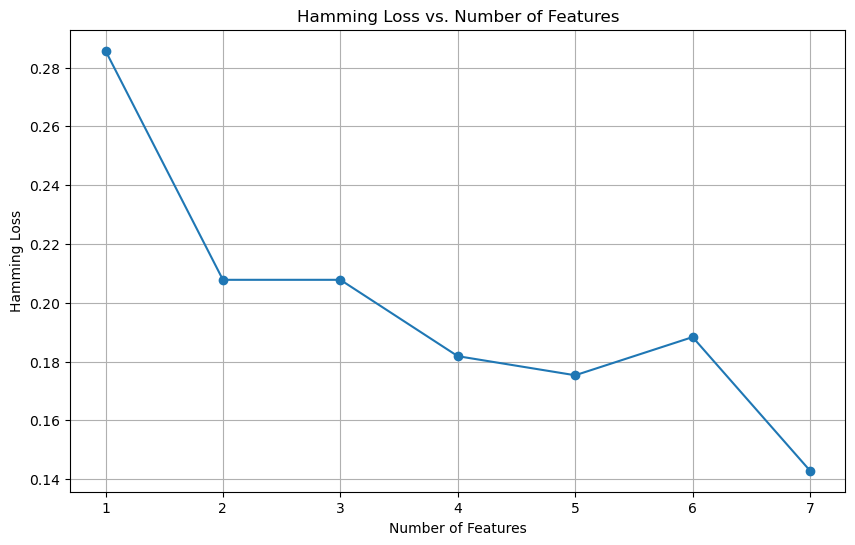

In [12]:
from sklearn.metrics import make_scorer, hamming_loss
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt
import numpy as np


# Custom scoring function for Hamming loss
def hamming_loss_score(y_true, y_pred):
    return np.sum(y_true.values != y_pred) / np.size(y_true)

hamming_loss_scorer = make_scorer(hamming_loss_score, greater_is_better=False)

# Maximum number of features to select
max_n_features = min(7, X_train.shape[1])

# Initialize variables to track the best score and features
best_score = np.inf  # Start with the highest possible value since we are minimizing Hamming loss
best_features = None
feature_counts = []
hamming_losses = []

# Sequential Feature Selector with a limit on the number of features
# Assuming X_test and y_test are already defined

for n_features in range(1, max_n_features + 1):
    sfs = SequentialFeatureSelector(
        multi_target_rf, 
        n_features_to_select=n_features, 
        direction='forward', 
        scoring=hamming_loss_scorer, 
        cv=cv_folds, 
        n_jobs=-1
    )
    try:
        sfs.fit(X_train, y_train)
        X_train_selected = sfs.transform(X_train)
        X_test_selected = sfs.transform(X_test)  # Transform the test set using the selected features
        
        # Reinitialize the random forest model
        multi_target_rf = RandomForestClassifier()  # Ensure to use the same parameters as before
        multi_target_rf.fit(X_train_selected, y_train)
        y_test_pred = multi_target_rf.predict(X_test_selected)
        score = hamming_loss_score(y_test, y_test_pred)  # Calculate Hamming loss on the test set
        
        # Debugging: Print intermediate results
        print(f"Number of features: {n_features}")
        print(f"Selected features: {X_train.columns[sfs.get_support()]}")
        print(f"Hamming loss: {score}")
        
        feature_counts.append(n_features)
        hamming_losses.append(score)
        
        if score < best_score:
            best_score = score
            best_features = X_train.columns[sfs.get_support()]
            best_n_features = n_features
    except Exception as e:
        print(f"Error with {n_features} features: {e}")

# Output the best number of features and the selected features
print(f"Best number of features: {best_n_features}")
print(f"Selected features: {best_features}")

# Plot the Hamming loss scores
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, hamming_losses, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Hamming Loss')
plt.title('Hamming Loss vs. Number of Features')
plt.grid(True)
plt.xticks(feature_counts)  # Set x-ticks to full integer values
plt.show()


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier

# Assuming `param_grid` is already defined
multi_target_rf = MultiOutputClassifier(RandomForestClassifier())

# Initialize GridSearchCV with the MultiOutputClassifier and the parameter grid
grid_search = GridSearchCV(estimator=multi_target_rf, param_grid=param_grid, cv=cv_folds, scoring=hamming_loss_scorer, verbose=2, n_jobs=-1)

# Fit the GridSearchCV to the training data with selected features
grid_search.fit(X_train_selected, y_train)

# Print the best parameters found by GridSearchCV
print("\nBest Parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Train the model using the best parameters
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best Parameters found by GridSearchCV:
{'estimator__criterion': 'gini', 'estimator__n_estimators': 500}


Accuracy for LIV_KIT_bin: 0.8571428571428571
Classification Report for LIV_KIT_bin:
                precision    recall  f1-score   support

0_insufficient       0.85      0.93      0.89        30
  1_sufficient       0.75      0.78      0.77        23
   2_preferred       1.00      0.83      0.91        24

      accuracy                           0.86        77
     macro avg       0.87      0.85      0.85        77
  weighted avg       0.87      0.86      0.86        77



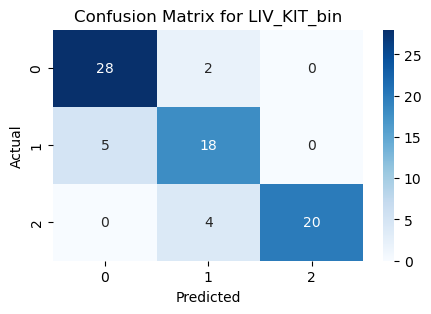

Accuracy for LIV_BATH_bin: 0.8441558441558441
Classification Report for LIV_BATH_bin:
                precision    recall  f1-score   support

0_insufficient       0.83      0.87      0.85        39
  1_sufficient       0.86      0.82      0.84        38

      accuracy                           0.84        77
     macro avg       0.85      0.84      0.84        77
  weighted avg       0.84      0.84      0.84        77



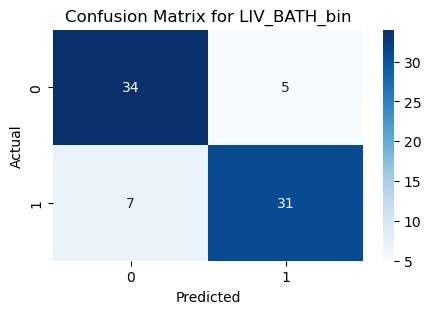

Hamming Loss: 0.14935064935064934
Subset Accuracy: 0.7272727272727273


In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the testing set with selected features
y_pred_test = best_rf.predict(X_test_selected)

# Evaluate each output individually
for i, col in enumerate(y_train.columns):
    accuracy = accuracy_score(y_test.iloc[:, i], y_pred_test[:, i])
    print(f"Accuracy for {col}: {accuracy}")
    print(f"Classification Report for {col}:\n{classification_report(y_test.iloc[:, i], y_pred_test[:, i])}")
    cm = confusion_matrix(y_test.iloc[:, i], y_pred_test[:, i])
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {col}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Calculate Hamming loss manually
def calculate_hamming_loss(y_true, y_pred):
    return np.sum(y_true.values != y_pred) / np.size(y_true)

hamming = calculate_hamming_loss(y_test, y_pred_test)
print(f"Hamming Loss: {hamming}")

# Calculate subset accuracy
subset_accuracy = np.mean(np.all(y_test.values == y_pred_test, axis=1))
print(f"Subset Accuracy: {subset_accuracy}")
